In [1]:
import pandas as pd

path = 's0'

acc = pd.read_csv(path+'/Accelerometer.csv')
acc


,time,seconds_elapsed,z,y,x
0,1750743731157222000,0.057222,1.696477,-0.068479,-1.485525
1,1750743731166825700,0.066826,1.540340,-0.524958,-1.214253
2,1750743731176429800,0.076430,1.107577,-0.566787,-0.928474
3,1750743731186033400,0.086033,0.571776,-0.370986,-0.841288
4,1750743731195637500,0.095637,0.189651,-0.127209,-0.963141
...,...,...,...,...,...
3179,1750743761784251000,30.684251,0.180392,0.035482,-0.034344
3180,1750743761793855000,30.693855,0.218608,0.020223,-0.055852
3181,1750743761803458800,30.703459,0.545256,-0.277441,0.001236
3182,1750743761813063000,30.713063,0.790023,-0.085684,0.000667


In [2]:
gyr = pd.read_csv(path+'/Gyroscope.csv')
gyr

,time,seconds_elapsed,z,y,x
0,1750743731162024000,0.062024,0.006050,0.406862,-0.315700
1,1750743731171627800,0.071628,-0.001375,0.387338,-0.185075
2,1750743731181231600,0.081232,-0.037950,0.339763,-0.117837
3,1750743731190835500,0.090835,-0.064900,0.244475,-0.119075
4,1750743731200439300,0.100439,-0.056238,0.100237,-0.172837
...,...,...,...,...,...
3185,1750743761789053000,30.689053,0.004812,-0.031625,-0.103125
3186,1750743761798657000,30.698657,-0.003712,-0.085387,-0.147125
3187,1750743761808260900,30.708261,-0.020900,-0.109862,-0.130075
3188,1750743761817865000,30.717865,-0.020900,-0.097625,-0.028600


In [3]:
import matplotlib.pyplot as plt

def fig_plot(data):
    # 绘制折线图
    plt.figure(figsize=(20, 8))  # 设置图表大小
    
    # 绘制每个字段的折线图
    plt.plot(data.index, data['x'], label='x')
    plt.plot(data.index, data['y'], label='y')
    plt.plot(data.index, data['z'], label='z')
    plt.legend()

    plt.show()

def fig_plot_sub(data, start, window):

    # 创建一个图形和10个子图（2行5列）
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))

    # 将axes转换为一维数组方便迭代
    axes = axes.ravel()

    # 遍历子图并绘制折线图
    for idx, ax in enumerate(axes):
        
        data_tmp = data.iloc[start[idx]:start[idx]+window,:]
        # print(data_tmp)
        ax.plot(data_tmp.index, data_tmp['x'], label='x')
        ax.plot(data_tmp.index, data_tmp['y'], label='y')
        ax.plot(data_tmp.index, data_tmp['z'], label='z')

    # 调整子图之间的间距
    plt.tight_layout()

    # 显示图形
    plt.show()


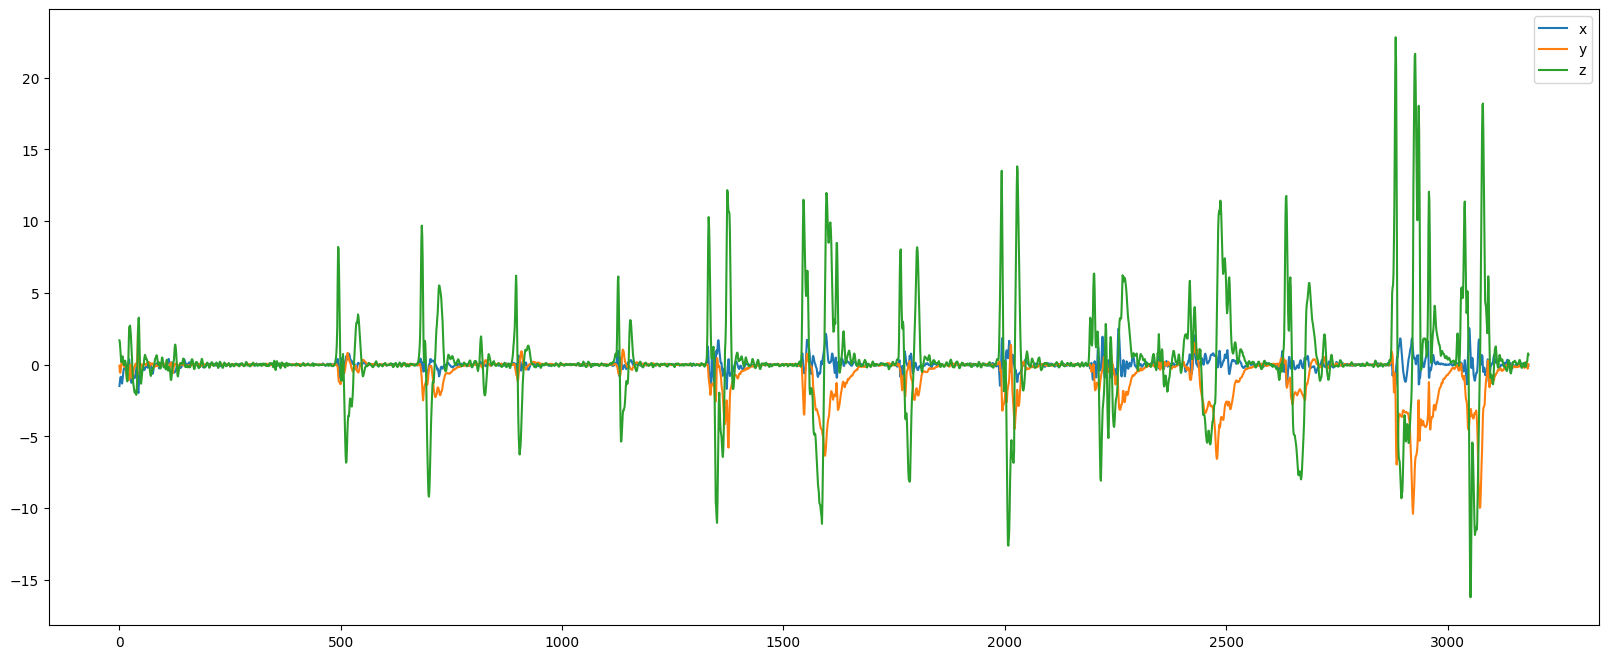

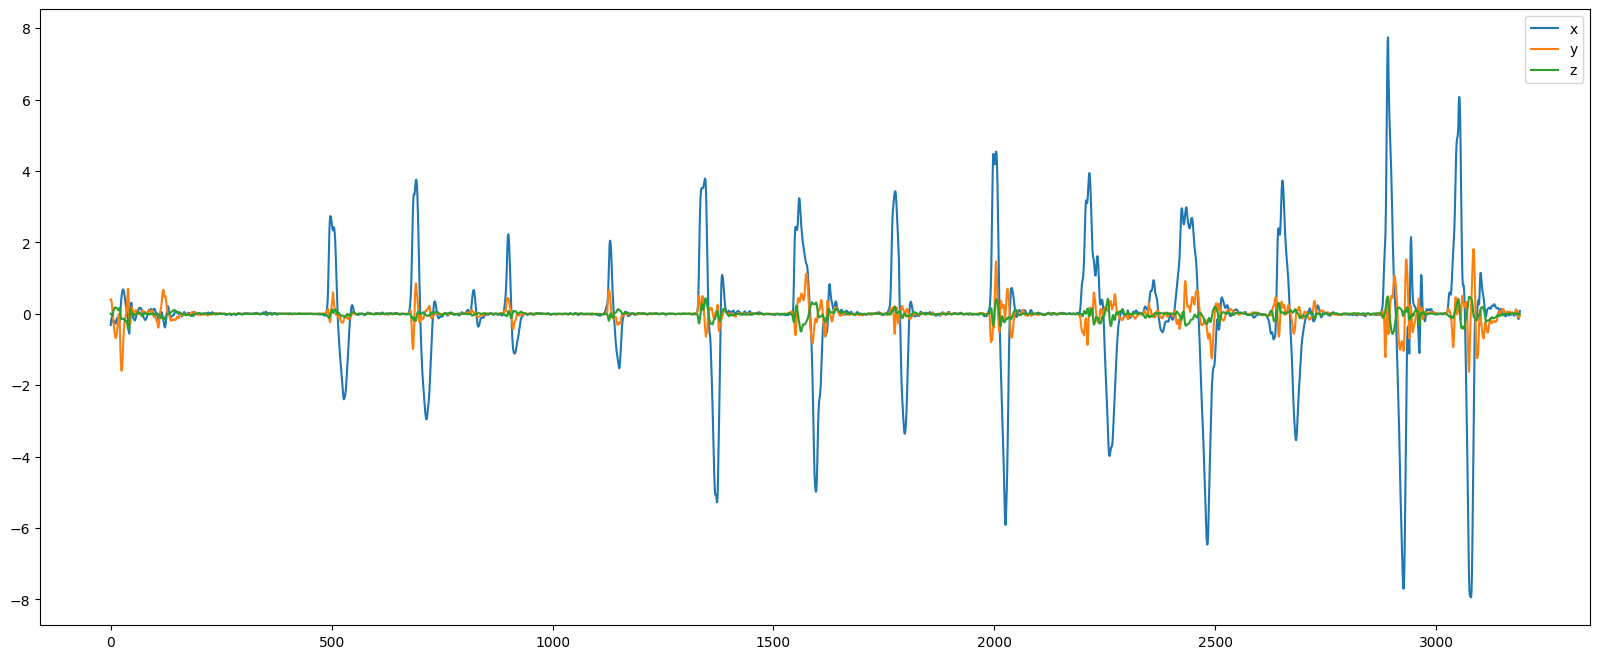

In [4]:
fig_plot(acc)
fig_plot(gyr)

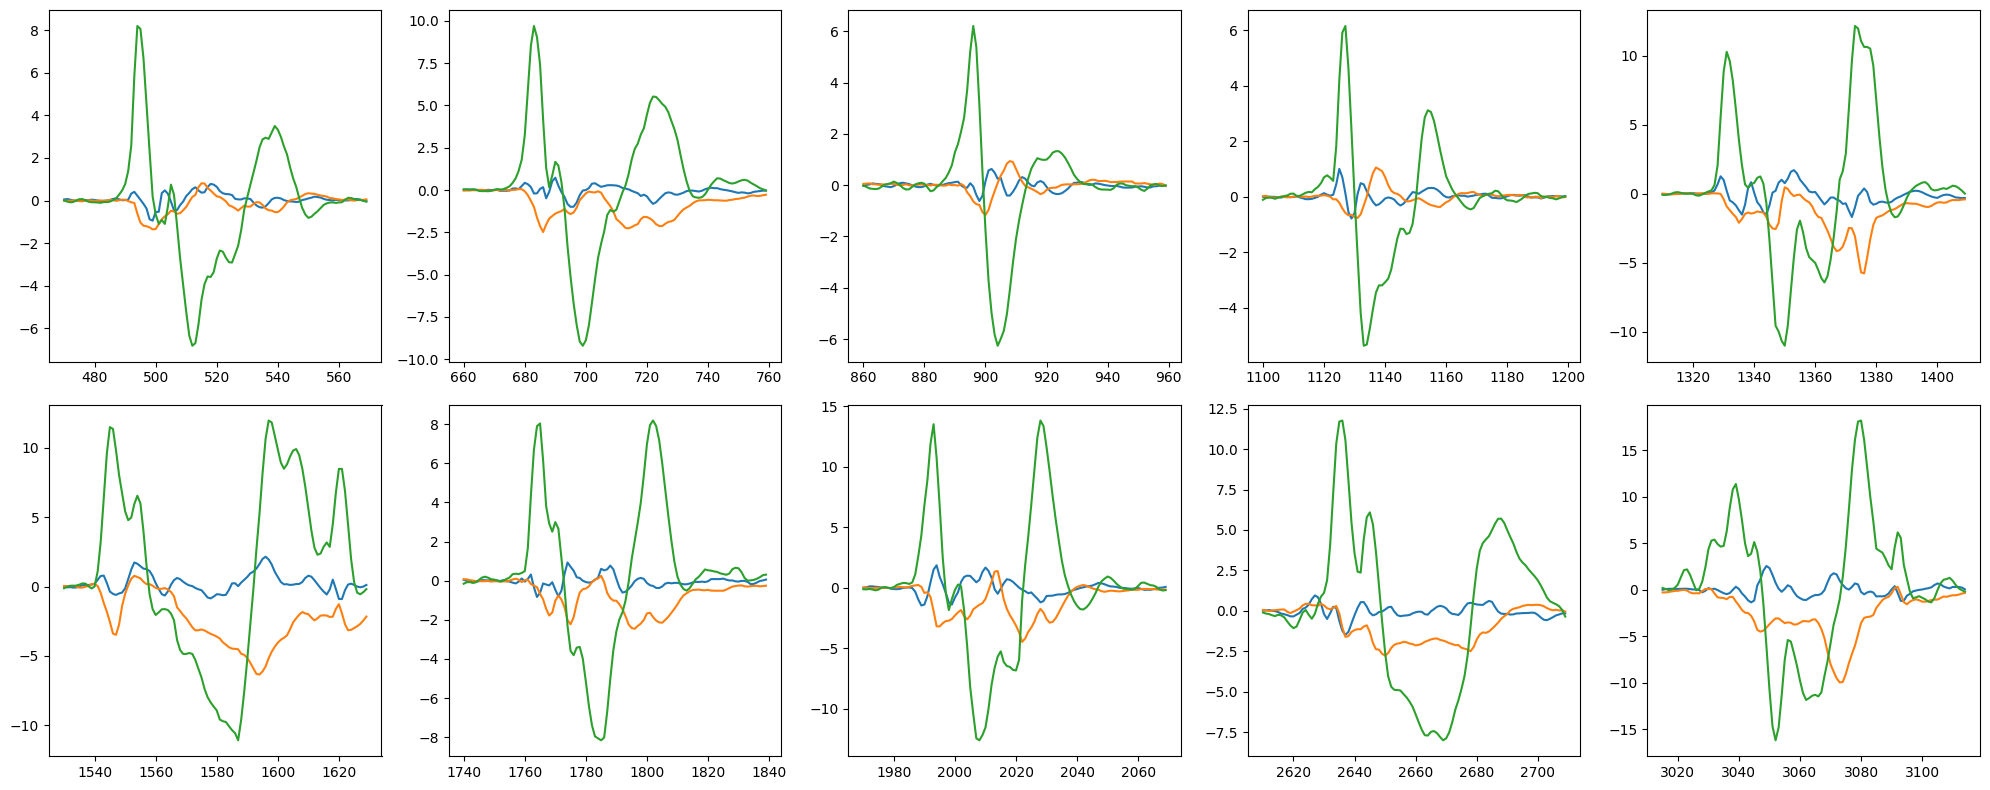

In [15]:
start = [470, 660, 860, 1100, 1310, 1530, 1740, 1970, 2610, 3015]
window = 100

fig_plot_sub(acc, start, window)

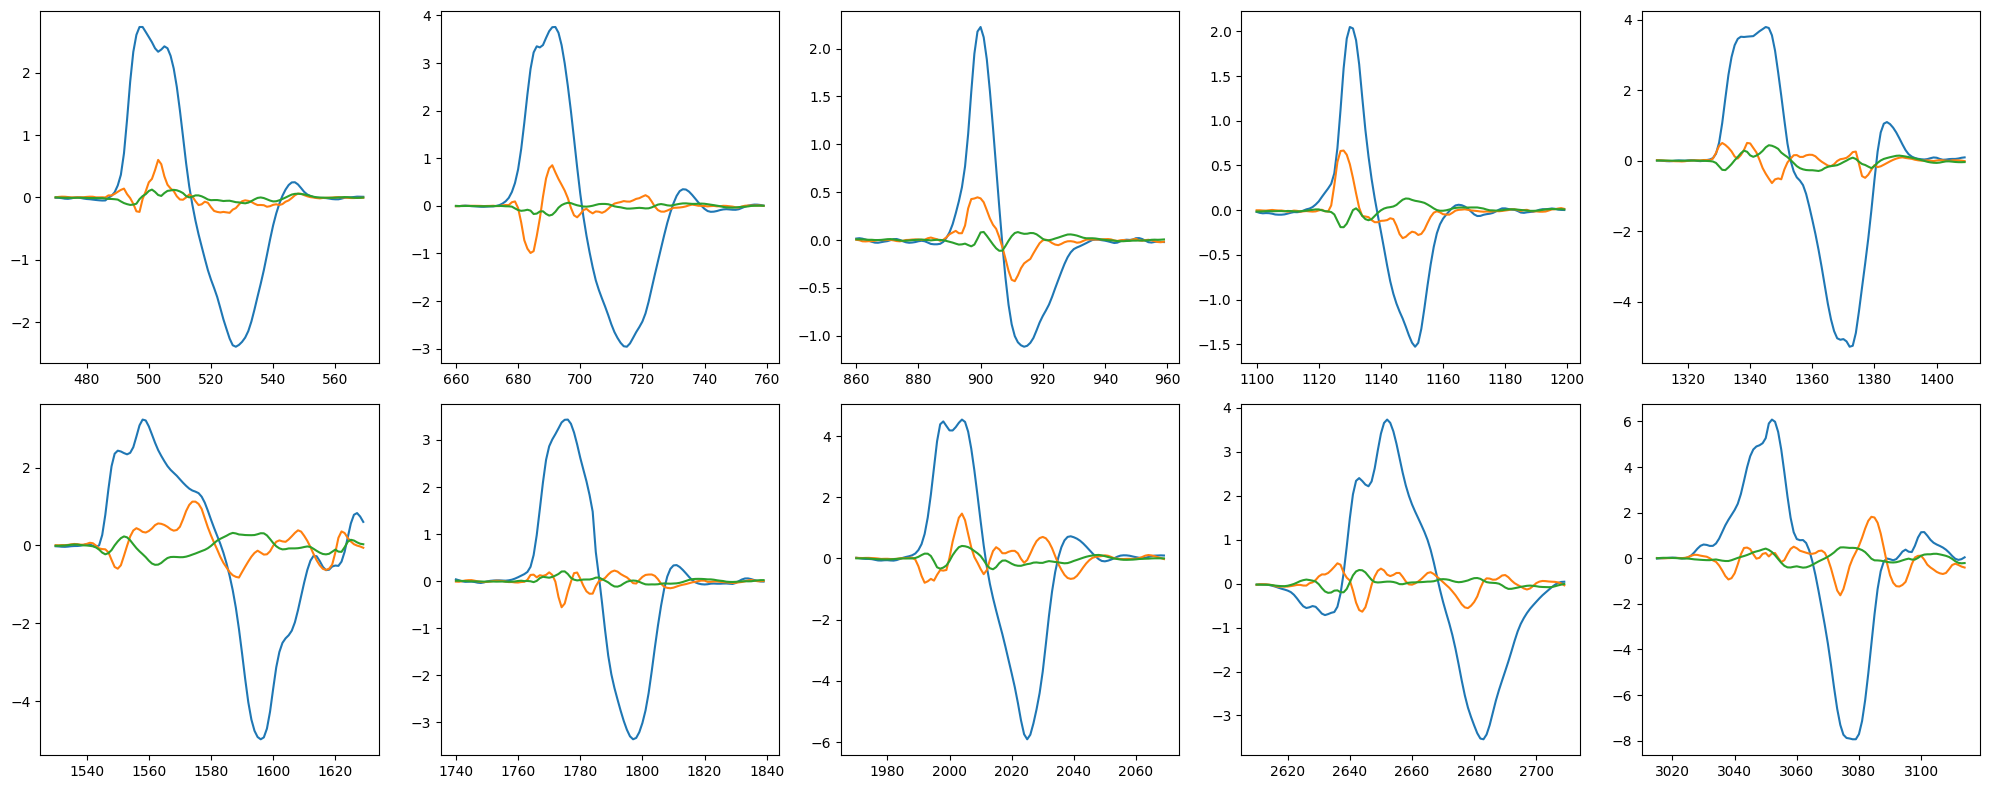

In [16]:
fig_plot_sub(gyr, start, window)

In [17]:
df_res = pd.DataFrame()

for i, j in enumerate(start):
    # fig_plot(data.iloc[i:i+window,:])
    df_acc = acc.iloc[j:j+window,2:]
    df_acc = df_acc[['x', 'y', 'z']]
    # print(df_acc)
    df_gyr = gyr.iloc[j:j+window,2:]
    df_gyr = df_gyr[['x', 'y', 'z']]
    # print(df_gyr)
    df_sam = pd.concat([df_acc, df_gyr], axis=1)
    df_sam['sample'] = i
    df_sam['label'] = 5
    df_sam.columns = ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'sample', 'label']
    # print(df_sam)
    df_res = pd.concat([df_res, df_sam], ignore_index=True)
print(df_res)



        acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z  sample  label
0    0.048963 -0.008052  0.003844 -0.007838  0.000137  0.001100       0      5
1    0.069734 -0.012687 -0.048959 -0.006600  0.007425 -0.002475       0      5
2    0.039011 -0.013056 -0.084686 -0.012788  0.011000 -0.004950       0      5
3    0.005938  0.005579 -0.070015 -0.021312  0.009900 -0.006187       0      5
4   -0.025691 -0.002266  0.008022 -0.023788  0.004950 -0.006187       0      5
..        ...       ...       ...       ...       ...       ...     ...    ...
995  0.295305 -0.606875  0.959383  0.095975 -0.300438 -0.031900       9      5
996  0.289475 -0.599855  0.500989 -0.027362 -0.241863 -0.134475       9      5
997  0.293313 -0.535400  0.137979 -0.076312 -0.297962 -0.204050       9      5
998  0.225215 -0.423089 -0.053719 -0.043313 -0.367675 -0.226050       9      5
999  0.036362 -0.353344 -0.208844  0.036162 -0.410437 -0.215050       9      5

[1000 rows x 8 columns]


In [ ]:
import numpy as np
from tensorflow.keras import models

# 按样本分组
df = df_res
samples = []
for sample_id in df['sample'].unique():
    sample_data = df[df['sample'] == sample_id]
    
    # 提取传感器数据
    sensor_data = sample_data[['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']].values
    samples.append(sensor_data)
    
data_for_prediction = np.array(samples)
model = models.load_model('best_model.h5')
predictions = model.predict(df_res)

(10, 100, 6)

In [12]:
df_res.to_csv(path+'.csv')

In [ ]:
df_exist = pd.read_csv(path+'.csv')
df_exist
# df_new = pd.concat([df_exist, df_res], ignore_index=True)
# print(df_new)

In [95]:
df_new.to_csv('0.csv')